# HR Salary prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Step 1: Data Cleaning

In [4]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [5]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [6]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [7]:
#Finding if special characters are present in the data 
df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

# Step 2: Data Visualization

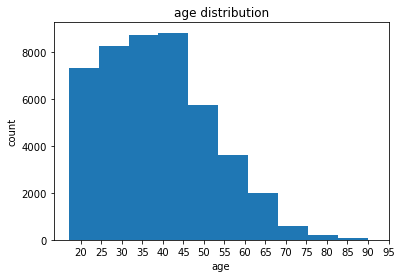

In [8]:
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.rcParams['figure.figsize']=(7,4)
plt.xticks(np.arange(20,100,5))
plt.title('age distribution')
plt.show()

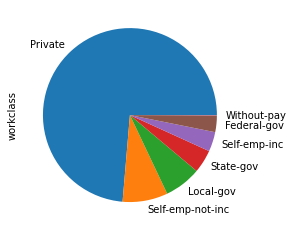

In [9]:
df['workclass'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
plt.show()

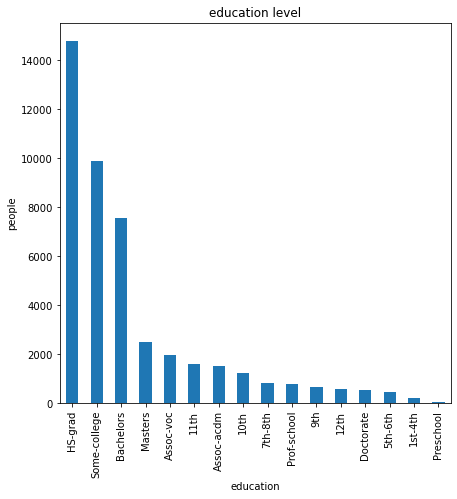

In [10]:
df['education'].value_counts().plot(kind='bar')
plt.xlabel('education')
plt.ylabel('people')
plt.rcParams['figure.figsize']=(5,4)
plt.title('education level')
plt.show()

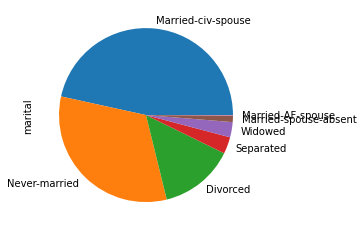

In [11]:
df['marital'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
plt.show()

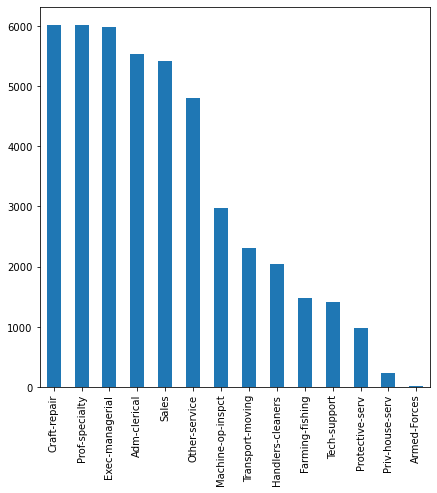

In [12]:
df['occupation'].value_counts().plot(kind='bar')
plt.show()

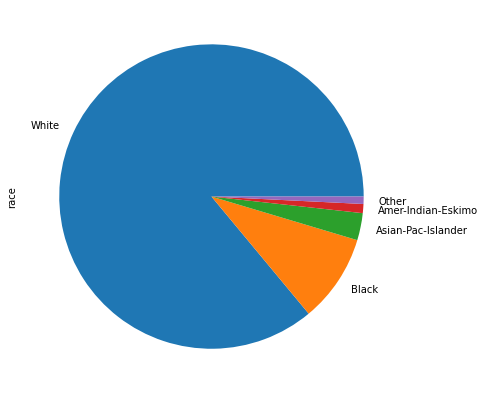

In [13]:
df['race'].value_counts().plot(kind='pie')
plt.show()

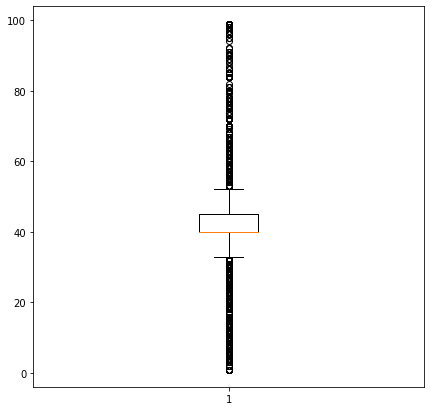

In [14]:
plt.boxplot(df['hours per week'])
plt.show()

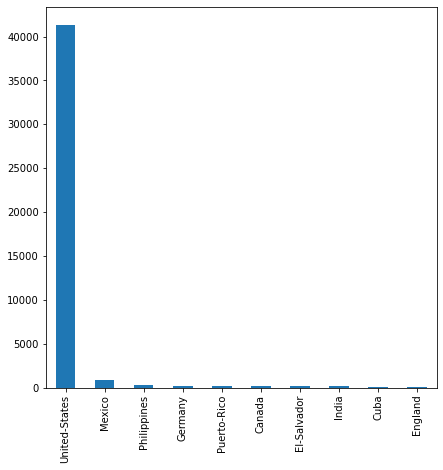

In [15]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.rcParams['figure.figsize']=(7,4)
plt.show()

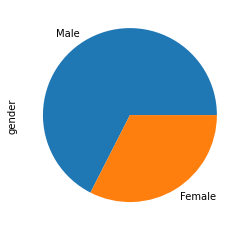

In [16]:
df['gender'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
plt.show()

In [17]:
df1=df.copy()

In [18]:
#running a loop of value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
152234     1
171301     1
257764     1
168312     1
257302     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

### Dropping the columns which are not necessary

In [19]:
#dropping based on uniquness of data from the dataset 
df1.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

# Step 3: Converting categorical columns to numerical

In [20]:
#mapping the data into numerical data using map function
df1['income'] = df1['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [21]:
#gender
df1['gender'] = df1['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [22]:
#race
df1['race'] = df1['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [23]:
#marital
df1['marital'] = df1['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [24]:
#workclass
df1['workclass'] = df1['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [25]:
#education
df1['education'] = df1['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])

In [27]:
#relationship
df1['relationship'] = df1['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [28]:
df1.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,4,4,3,0,0
2,4,9,2,10,4,3,0,1
3,5,0,2,6,4,0,0,1
5,5,13,5,7,0,3,0,0


### Splitting the dependent column and independent columns

In [29]:
X = df1.loc[:,df1.columns != 'income']
X.head()

,workclass,education,marital,occupation,relationship,race,gender
0,5,11,5,6,5,0,0
1,5,3,2,4,4,3,0
2,4,9,2,10,4,3,0
3,5,0,2,6,4,0,0
5,5,13,5,7,0,3,0


In [30]:
y = df1.income
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int32

# Step 4: Splitting the dataset into train and test part

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

# Step 5: Standarizing the data before model building

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Building ml model using Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

In [36]:
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
36172,0,0
36173,1,0
36174,0,0
36175,0,0


In [37]:
pd.DataFrame(zip(y_test, y_pred_test), columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,1,0
...,...,...
9040,1,0
9041,1,1
9042,1,1
9043,0,0


# Step 7: Evaluating the model using metrics 

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
# Accuracy on train data
accuracy_score(y_train, y_pred_train)

0.7524117533239351

In [40]:
# Accuracy on test data
accuracy_score(y_test, y_pred_test)

0.7579878385848535

In [57]:
from sklearn.metrics import classification_report

In [58]:
confusion_matrix(y_test,y_pred_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      6808
           1       0.53      0.20      0.29      2237

    accuracy                           0.76      9045
   macro avg       0.66      0.57      0.57      9045
weighted avg       0.72      0.76      0.71      9045



# Building ml model using Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [42]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = rf_classifier.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred_rf)

0.8201216141514649

# Step 8: Tuning the hyperparameter using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

In [47]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [49]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [50]:
best_rf_classifier = grid_search.best_estimator_

In [51]:
y_pred1 = best_rf_classifier.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred1)

0.8274184632393587

In [59]:
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6808
           1       0.69      0.55      0.61      2237

    accuracy                           0.83      9045
   macro avg       0.78      0.73      0.75      9045
weighted avg       0.82      0.83      0.82      9045



# CONCLUSION

__After building model using these two algorithms and evaluating the accuracy score it shows that random forest gives higher accuracy. It means that it predicts the salary with better accuracy then logistic regression__